## Curse of Dimensionality
- 차원이 높아질수록 sparseness 증가 -> modeling의 난이도 증가
- 데이터의 feature를 더럽히자 않으면서 낮은 차원에서 포현 필요  

## 차원축소
  
### PCA, Linear Dimension Reduction
- n차원의 공간에 샘플들의 분포가 있을 때, 분포를 설명하기 위한새로운 axis를 찾아내는 과정
- 새로운 axis는 2가지 조건을 만족해야함
  - 분포의 점을 Projection하는 점을 찍었을 때 점간의 거리의 합이 최대가 되는 선
  - 선과 분포 사이의 거리의 합이 최소가 되는 선 (Projection된 점과 원래의 점간의 거리가 정보의 손실)
- Uniform하게 분포가 이루어져 있을때 축소가 가능하다는 단점이 있음...??


### Manifold
- 고차원 공간의 샘플이 저차원 다양체(manifold)의 형태로 분포해 있다는 가정
- manifold를 해당 차원의 공간에 mapping할 수 있다고 가정

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

In [4]:
from module.utils import load_mnist
from module.trainer import Trainer

In [5]:
def show_image(x):
    if x.dim() == 1:
        x = x.view(int(x.size(0) ** .5), -1)
    
    plt.imshow(x, cmap='gray')
    plt.show()

In [6]:
from argparse import Namespace

config = {
    'train_ratio': .8,
    'batch_size': 256,
    'n_epochs': 50,
    'verbose': 1,
    'btl_size': 2
}

config = Namespace(**config)

print(config)

Namespace(train_ratio=0.8, batch_size=256, n_epochs=50, verbose=1, btl_size=2)


In [8]:
train_x, train_y = load_mnist(flatten=True)
test_x, test_y = load_mnist(is_train=False, flatten=True)

train_cnt = int(train_x.size(0) * config.train_ratio)
valid_cnt = train_x.size(0) - train_cnt

indices = torch.randperm(train_x.size(0))
train_x, valid_x = torch.index_select(
    train_x,
    dim=0,
    index=indices
).split([train_cnt, valid_cnt], dim=0)

train_y, valid_y = torch.index_select(
    train_y,
    dim=0,
    index=indices
).split([train_cnt, valid_cnt], dim=0)

In [12]:
from module.model import Autoencoder

In [13]:
model = Autoencoder(btl_size=config.btl_size)
optimizer = optim.Adam(model.parameters())
crit = nn.MSELoss()

trainer = Trainer(model, optimizer, crit)

In [14]:
trainer.train((train_x, train_x), (valid_x, valid_x), config)

Epoch(1/50): train_loss=7.3845e-02  valid_loss=5.0692e-02  lowest_loss=5.0692e-02
Epoch(2/50): train_loss=4.8728e-02  valid_loss=4.6016e-02  lowest_loss=4.6016e-02
Epoch(3/50): train_loss=4.5767e-02  valid_loss=4.4274e-02  lowest_loss=4.4274e-02
Epoch(4/50): train_loss=4.4186e-02  valid_loss=4.2983e-02  lowest_loss=4.2983e-02
Epoch(5/50): train_loss=4.3195e-02  valid_loss=4.2498e-02  lowest_loss=4.2498e-02
Epoch(6/50): train_loss=4.2540e-02  valid_loss=4.2855e-02  lowest_loss=4.2498e-02
Epoch(7/50): train_loss=4.2215e-02  valid_loss=4.1387e-02  lowest_loss=4.1387e-02
Epoch(8/50): train_loss=4.1399e-02  valid_loss=4.0550e-02  lowest_loss=4.0550e-02
Epoch(9/50): train_loss=4.1385e-02  valid_loss=4.0078e-02  lowest_loss=4.0078e-02
Epoch(10/50): train_loss=4.1123e-02  valid_loss=4.0031e-02  lowest_loss=4.0031e-02
Epoch(11/50): train_loss=4.0847e-02  valid_loss=4.0520e-02  lowest_loss=4.0031e-02
Epoch(12/50): train_loss=4.0575e-02  valid_loss=4.0924e-02  lowest_loss=4.0031e-02
Epoch(13/50):

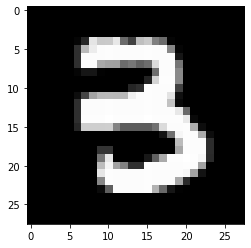

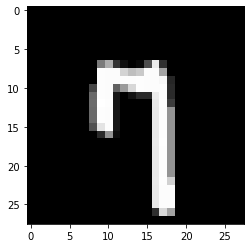

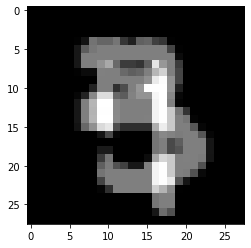

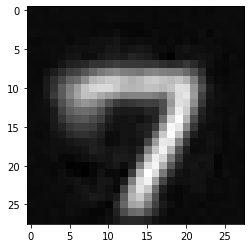

In [15]:
with torch.no_grad():
    import random
    
    index1 = int(random.random() * test_x.size(0))
    index2 = int(random.random() * test_x.size(0))
    
    z1 = model.encoder(test_x[index1].view(1, -1))
    z2 = model.encoder(test_x[index2].view(1, -1))
    
    recon = model.decoder((z1 + z2) / 2).squeeze()
    
    show_image(test_x[index1])
    show_image(test_x[index2])
    show_image((test_x[index1] + test_x[index2]) / 2)
    show_image(recon)